In [15]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [16]:
im_width = 128
im_height = 128
epochs=100
batch_size=8

In [17]:
train_data_dir = 'simdata/train'
valid_data_dir = 'simdata/validation'

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(directory=train_data_dir,
                                            target_size=(im_width,im_height),
                                            batch_size=batch_size,
                                            classes=['dogs','cats'],
                                            class_mode='binary')

validation_generator = test_datagen.flow_from_directory(directory=valid_data_dir,
                                            target_size=(im_width,im_height),
                                            batch_size=batch_size,
                                            classes=['dogs','cats'],
                                            class_mode='binary')
print(train_generator.class_indices)
print(validation_generator.class_indices)

Found 338 images belonging to 2 classes.
Found 94 images belonging to 2 classes.
{'dogs': 0, 'cats': 1}
{'dogs': 0, 'cats': 1}


In [21]:
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.BatchNormalization(input_shape=(im_width,im_height,3)))
model.add(tf.keras.layers.Conv2D(32,input_shape=(im_width,im_height,3),kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        102464    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)             

In [23]:
print('starting training....')
training = model.fit_generator(generator=train_generator, steps_per_epoch=297 // batch_size,epochs=epochs,validation_data=validation_generator,validation_steps=83 // batch_size)
#training = model.fit_generator(generator=train_generator, steps_per_epoch=5,epochs=epochs,validation_data=validation_generator,validation_steps=5)

print('training finished!!')

starting training....
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 37 steps, validate for 10 steps
Epoch 1/100
37/37 [==============================] - 12s 328ms/step - loss: 0.8754 - accuracy: 0.5552 - val_loss: 0.6791 - val_accuracy: 0.6000
Epoch 2/100
37/37 [==============================] - 11s 308ms/step - loss: 0.7007 - accuracy: 0.5379 - val_loss: 0.6863 - val_accuracy: 0.6000
Epoch 3/100
37/37 [==============================] - 11s 309ms/step - loss: 0.6911 - accuracy: 0.5483 - val_loss: 0.6900 - val_accuracy: 0.6000
Epoch 4/100
37/37 [==============================] - 12s 311ms/step - loss: 0.6953 - accuracy: 0.5338 - val_loss: 0.6813 - val_accuracy: 0.6000
Epoch 5/100
37/37 [==============================] - 11s 308ms/step - loss: 0.6900 - accuracy: 0.5414 - val_loss: 0.6904 - val_accuracy: 0.6625
Epoch 6/100
37/37 [==============================] - 11s 306ms/step - loss: 0.6853 - accuracy: 0.5414 - val_loss: 0.6905 - val_accuracy: 0.6000
Epoch 7/100
37/37 [===

##### TRY2 

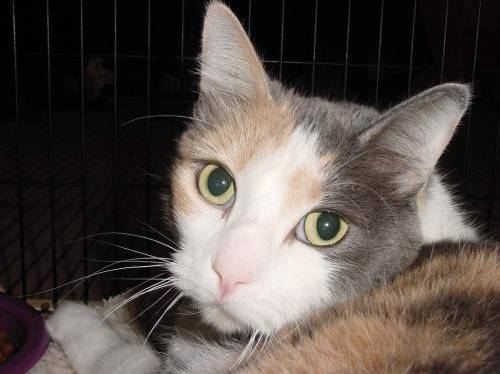

[[1.]]
cat


In [11]:
from keras.preprocessing import image
from IPython.display import display
from PIL import Image
import os
img_path = 'img.jpg'
img=Image.open(img_path)
display(img)

test_image = image.load_img(img_path, target_size=(im_width,im_height))
test_image = image.img_to_array(test_image)
#print(test_image.shape)
test_image=np.expand_dims(test_image, axis=0)
#print(test_image.shape)

result = model.predict(test_image)
print(result)
if result[0][0] >= 0.5:
    prediction = "cat"
else:
    prediction = 'Dog'
    
print(prediction)

In [38]:
model.save('cnn_mnist_model.h5')

In [39]:
#from keras.models import load_modelfrom keras import load_model
cls = tf.keras.models.load_model('cnn_mnist_model.h5')

In [40]:
cls.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [2]:
model = tf.keras.models.load_model('cnn_mnist_model.h5')
#model.layers[0].input_shape #(None, 160, 160, 3)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [16]:
# import os
# batch_holder = np.zeros((20, im_width, im_height, 3))
# img_dir='test/'
# for i,img in enumerate(os.listdir(img_dir)):
#   img = image.load_img(os.path.join(img_dir,img), target_size=(im_width, im_height))
#   batch_holder[i, :] = img

In [17]:
# result = model.predict_classes(batch_holder)
# import matplotlib.pyplot as plt
 
# fig = plt.figure(figsize=(20, 20))
 
# for i,img in enumerate(batch_holder):
#   fig.add_subplot(4,5, i+1)
#   plt.title(get_label_name(result[i][0]))
#   plt.imshow(img/256.)
  
# plt.show()

In [55]:
model = tf.keras.models.load_model('cnn_mnist_model.h5')

In [56]:
m2= tf.keras.models.load_model('cnn_mnist_model.h5')

In [19]:
submission_path = 'submissions'

In [20]:
test_data_dir = 'check/testset'

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 10 images belonging to 3 classes.


In [25]:
TEST_SIZE = 10
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Instructions for updating:
Please use Model.predict, which supports generators.


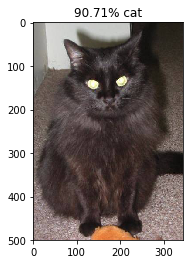

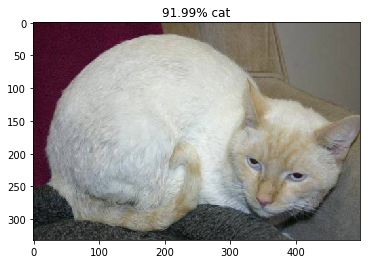

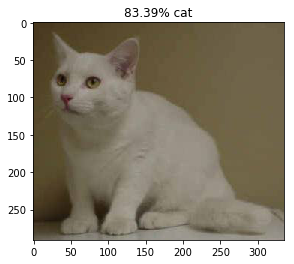

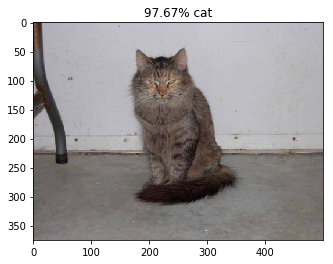

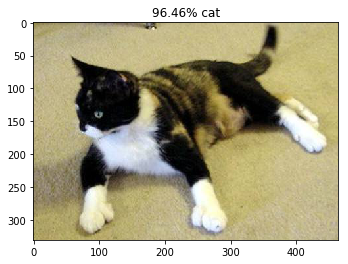

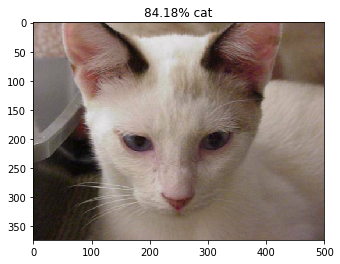

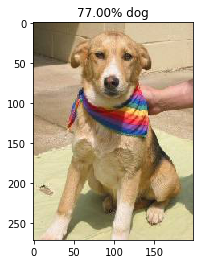

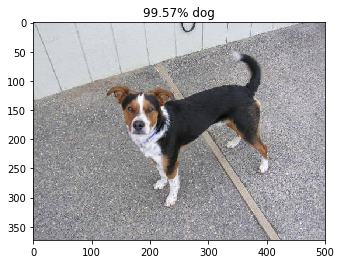

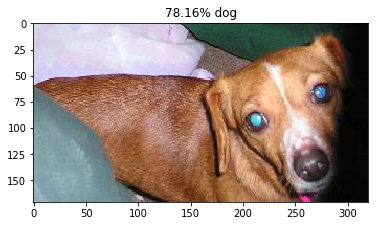

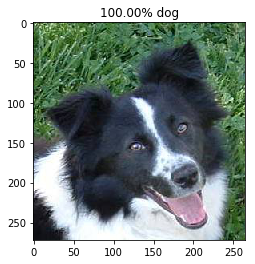

In [24]:
probabilities = model.predict_generator(test_generator, TEST_SIZE)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% cat")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% dog")
    plt.show()

In [91]:
# import pandas as pd
# test_set1.reset
# ytesthat = model.predict_generator(test_set1)
# df = pd.DataFrame({
#     'filename':test_set1.filenames,
#     'predict':ytesthat[:,0],
#     'y':test_set1.classes
# })

In [11]:
# pd.set_option('display.float_format', lambda x: '%.5f' % x)
# df['y_pred'] = df['predict']>0.5
# df.y_pred = df.y_pred.astype(int)
# df.head(10)

In [12]:
# test_dir = 'check/images'

In [98]:
# # test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(128, 128),
#     batch_size=8,
#     class_mode='binary')

# test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
# print('test acc:', test_acc)

Found 10 images belonging to 3 classes.
  ...
    to  
  ['...']
test acc: 0.6


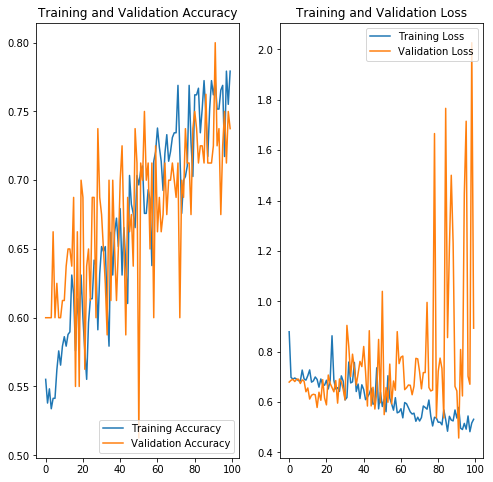

In [26]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

loss=model.history.history['loss']
val_loss=model.history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
# import matplotlib.pyplot as plt
# from matplotlib import pyplot
# #import sys

In [28]:
# def summarize_diagnostics(history):
# 	# plot loss
# 	pyplot.subplot(211)
# 	pyplot.title('Cross Entropy Loss')
# 	pyplot.plot(history.history['loss'], color='blue', label='train')
# 	pyplot.plot(history.history['val_loss'], color='orange', label='test')
# 	# plot accuracy
# 	pyplot.subplot(212)
# 	pyplot.title('Classification Accuracy')
# 	pyplot.plot(history.history['accuracy'], color='blue', label='train')
# 	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
# 	# save plot to file
# 	filename = sys.argv[0].split('/')[-1]
# 	pyplot.savefig(filename + '_plot.png')
# 	pyplot.close()

In [29]:
# summarize_diagnostics(model.history)